In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, recall_score, f1_score,accuracy_score,log_loss,precision_score

import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df = df.iloc[:,:-1]

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

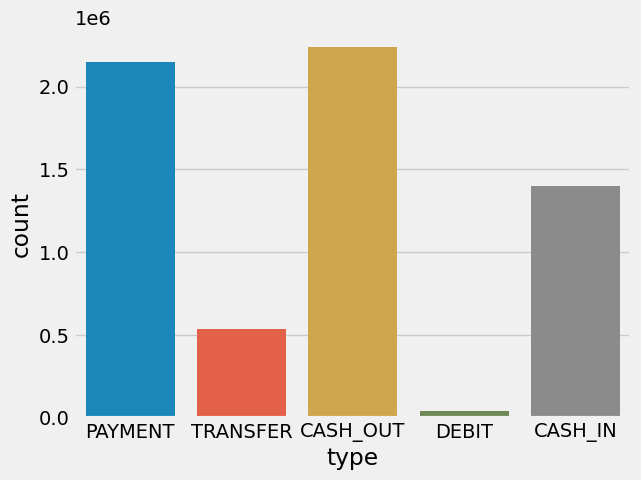

In [10]:
sns.countplot(x='type', data=df)

<Axes: xlabel='type', ylabel='amount'>

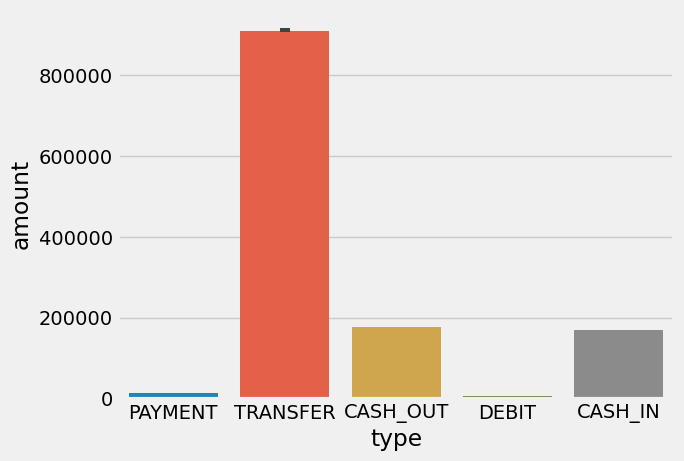

In [11]:
sns.barplot(x='type', y='amount', data=df)

In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

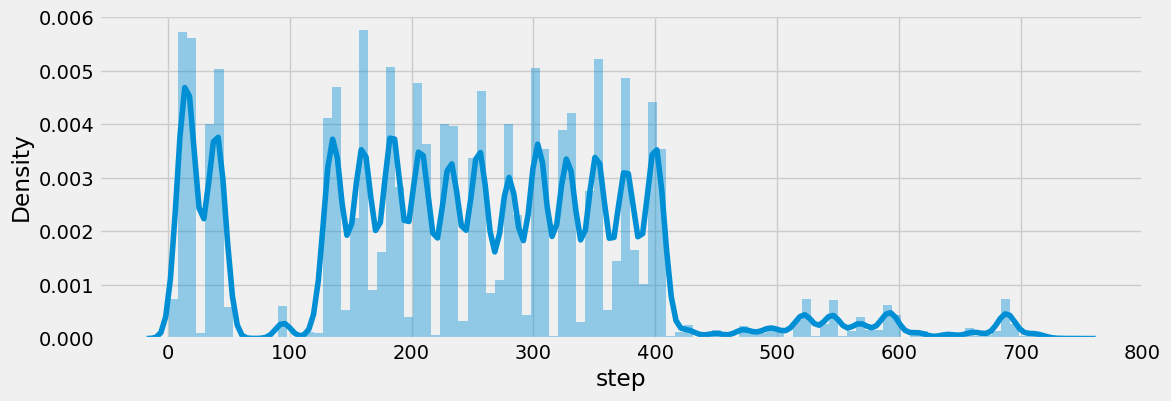

In [13]:
plt.figure(figsize=(12, 4))
sns.distplot(df['step'], bins=100)

<Axes: >

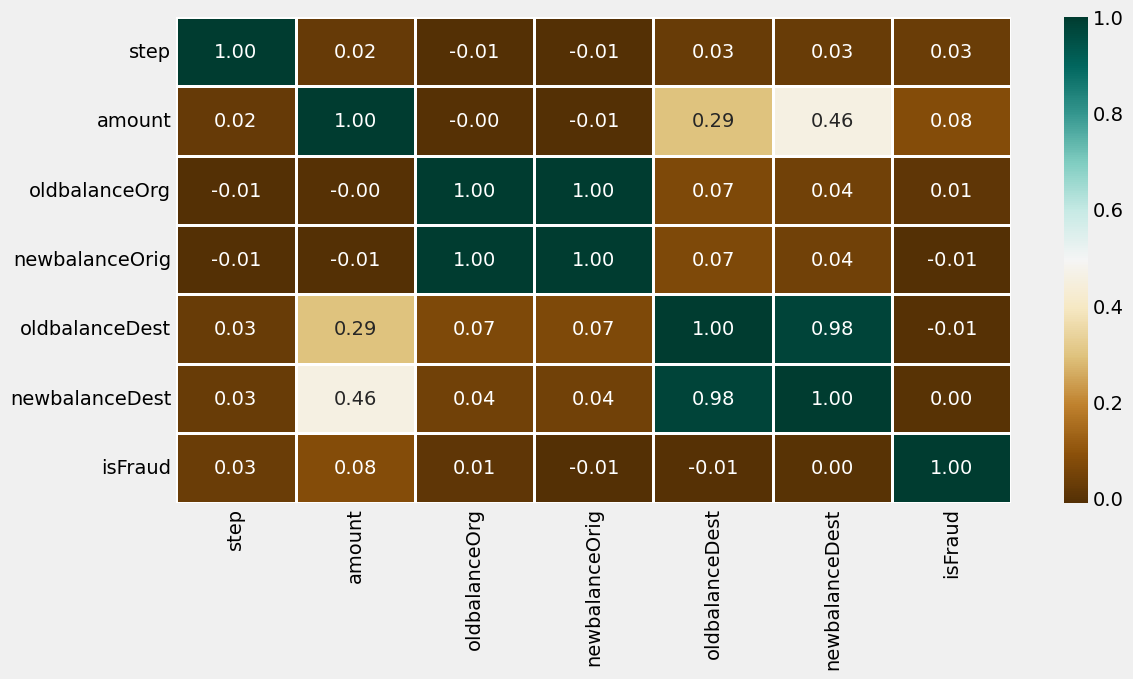

In [14]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

In [15]:
type_new = pd.get_dummies(df['type'], drop_first=True)
df_new = pd.concat([df, type_new], axis=1)
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [16]:
X = df_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = df_new['isFraud']
X.shape, y.shape

((6362620, 10), (6362620,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGB.score(X_train,y_train)

0.9998605695677028

In [19]:
XGB.score(X_test,y_test)

0.9997637241681362

In [20]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LR.score(X_train,y_train)

0.9982801334760119

In [21]:
LR.score(X_test,y_test)

0.9983256373422689

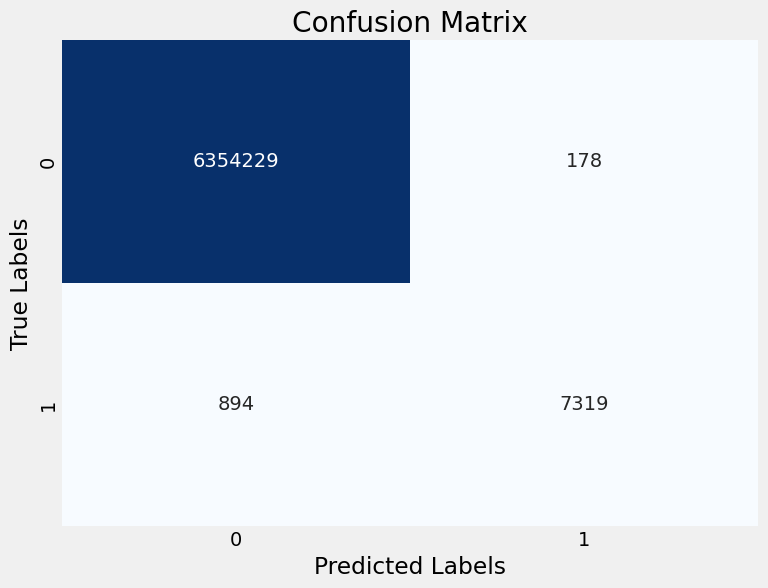

In [22]:
y_pred = XGB.predict(X)

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
recall = recall_score(y, y_pred)
recall

0.8911481797150859

In [24]:
f1 = f1_score(y, y_pred)
f1

0.9317632081476768

In [25]:
accuracy=accuracy_score(y,y_pred)
accuracy

0.9998315159478328

In [26]:
lo=log_loss(y,y_pred)
lo

0.006072780777908361

In [31]:
p=precision_score(y,y_pred)
p

0.9762571695344805

In [27]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Make predictions for the test set
y_predd = decision_tree_classifier.predict(X)
pdd=precision_score(y,y_predd)
ad=accuracy_score(y,y_predd)
f1d=f1_score(y,y_predd)
lod=log_loss(y,y_predd)
rd=recall_score(y,y_predd)
print(pdd,ad,f1d,lod,rd)

0.9675920264155559 0.9999110429351431 0.9654667480170837 0.0032063376122166186 0.9633507853403142


In [28]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions for the test set
y_predn = naive_bayes_classifier.predict(X)
pn=precision_score(y,y_predn)
an=accuracy_score(y,y_predn)
f1n=f1_score(y,y_predn)
lon=log_loss(y,y_predn)
rn=recall_score(y,y_predn)
print(pn,an,f1n,lon,rn)

0.0029519071032954396 0.6247691988520452 0.005883624162582899 13.524688937497626 0.8602215999025935


In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions for the test set
y_predk = knn_classifier.predict(X)
pk=precision_score(y,y_predk)
ak=accuracy_score(y,y_predk)
f1k=f1_score(y,y_predk)
lok=log_loss(y,y_predk)
rk=recall_score(y,y_predk)
print(pk,ak,f1k,lok,rk)

0.8925381734370499 0.9995657449289758 0.8176839326954801 0.015652139262462998 0.7544137343236332
